In [1]:
import pandas as pd
import numpy as np
import math
import statistics
import scipy.stats

## Import Data

In [2]:
df = pd.read_csv("nyc-rolling-sales.csv")
df

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,...,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,...,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,...,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

In [4]:
df.shape

(84548, 22)

In [5]:
df.describe()

,Unnamed: 0,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE
count,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000
mean,10344.359878,2.998758,4237.218976,376.224015,10731.991614,2.025264,0.193559,2.249184,1789.322976,1.657485
std,7151.779436,1.289790,3568.263407,658.136814,1290.879147,16.721037,8.713183,18.972584,537.344993,0.819341
min,4.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4231.000000,2.000000,1322.750000,22.000000,10305.000000,0.000000,0.000000,1.000000,1920.000000,1.000000
50%,8942.000000,3.000000,3311.000000,50.000000,11209.000000,1.000000,0.000000,1.000000,1940.000000,2.000000
75%,15987.250000,4.000000,6281.000000,1001.000000,11357.000000,2.000000,0.000000,2.000000,1965.000000,2.000000
max,26739.000000,5.000000,16322.000000,9106.000000,11694.000000,1844.000000,2261.000000,2261.000000,2017.000000,4.000000


In [6]:
block = df["BLOCK"]
block

0         392
1         399
2         399
3         402
4         404
         ... 
84543    7349
84544    7349
84545    7351
84546    7100
84547    7105
Name: BLOCK, Length: 84548, dtype: int64

## Measure of Central Tendency: Mean

In [7]:
block.mean()

4237.218976202867

## Measure of Central Tendency: Median

In [8]:
block.median()

3311.0

## Measure of Central Tendency: Modus

In [9]:
block.mode()

0    5066
Name: BLOCK, dtype: int64

## Measure of Spread: Range

In [10]:
range = max(block) - min(block)
range

16321

## Measure of Spread: Varian

In [11]:
var = np.var(block)
var

12732353.14412966

## Measure of Spread: Standard Deviation

In [12]:
stdv = np.std(block)
stdv

3568.2423045709297

## Probability Distribution

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import Math, Latex
from IPython.core.display import Image
import numpy as np

In [15]:
import seaborn as sns
sns.set(color_codes = True)
sns.set(rc={'figure.figsize': (5,5)})

## Normal Distribution

In [16]:
from scipy.stats import norm

In [17]:
normal = df["RESIDENTIAL UNITS"]
normal

0         5
1        28
2        16
3        10
4         6
         ..
84543     2
84544     2
84545     2
84546     0
84547     0
Name: RESIDENTIAL UNITS, Length: 84548, dtype: int64

C:\Users\Acer\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Normal Distribution'), Text(0, 0.5, 'frequency')]

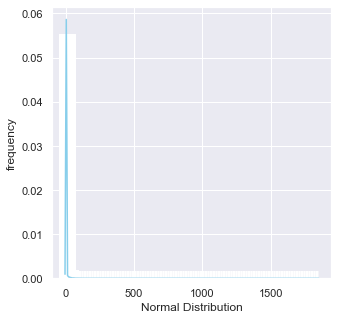

In [18]:
ax = sns.distplot(normal,
                bins=100,
                kde=True,
                color='skyblue',
                hist_kws={"linewidth":15, "alpha":1}
                )
ax.set(xlabel = "Normal Distribution", ylabel = "frequency") 

In [19]:
dx = df[["BOROUGH", "RESIDENTIAL UNITS"]].groupby("BOROUGH").sum()
dx

,RESIDENTIAL UNITS
BOROUGH,
1,42241
2,24225
3,48951
4,45491
5,10324


In [20]:
n = df["RESIDENTIAL UNITS"].sum()
n

171232

In [21]:
p_ru = df.loc[df["BOROUGH"]==1, "RESIDENTIAL UNITS"].sum() / n
p_ru

0.24668870304615959

In [22]:
se = np.sqrt(p_ru * ((1 - p_ru) / n))
se

0.0010417641459155103

In [23]:
z_score = 1.96

lcb = p_ru - (z_score * se)
ucb = p_ru + (z_score * se)

lcb, ucb

(0.24464684532016517, 0.248730560772154)

In [24]:
import statsmodels.api as sm
sm.stats.proportion_confint(n * p_ru, n)

(0.24464688283978006, 0.2487305232525391)

In [25]:
mean = df.loc[df["BOROUGH"]==1, "RESIDENTIAL UNITS"].sum()
mean_ = mean / n
mean_

0.24668870304615959

## Hypothesis Testing

H0 : Data Berdistribusi Normal
H1 : Data tidak Berdistribusi Normal

In [26]:
from scipy.stats import normaltest

In [27]:
normal

0         5
1        28
2        16
3        10
4         6
         ..
84543     2
84544     2
84545     2
84546     0
84547     0
Name: RESIDENTIAL UNITS, Length: 84548, dtype: int64

In [28]:
stat, p=normaltest(normal)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Data Berdistribusi Normal')
else:
    print('Data tidak Berdistribusi Normal')

stat=284645.866, p=0.000
Data tidak Berdistribusi Normal
